In [3]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r"D:\Nam 4\Ki 1\Lap trinh cho KHDL\Final Project\LTKHDL\data\cleaned_data.csv")
df.head(5)

,age,sex,race,marital_status,education,employment_status,income_level,books_read_last_12m,read_printed_books_last_12m,read_audiobooks_last_12m,read_ebooks_last_12m,last_book_read_format,read_daily_news,read_magazines_journals
0,66,Male,Refused,Divorced,College graduate,Retired,3,97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,1,97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,1,97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,5,97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,2,97,Yes,Yes,No,Purchased the book,Yes,No


## Câu hỏi khai thác insight data

### Câu 1. Mối quan hệ giữa độ tuổi và hành vi đọc sách

* Câu hỏi: Độ tuổi ảnh hưởng như thế nào đến hành vi đọc sách in, sách nói và sách điện tử? Có phải người trẻ tuổi thích sách điện tử hơn, trong khi người lớn tuổi thích sách in không?
* Ý nghĩa thu được: Hiểu được thói quen đọc sách theo độ tuổi giúp đưa ra các chiến lược tiếp thị phù hợp với từng nhóm tuổi.

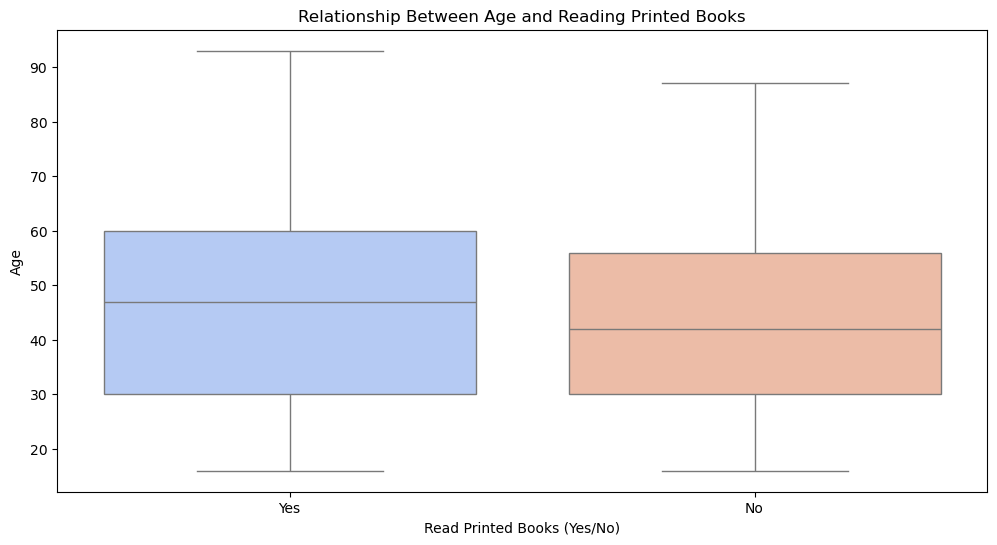

In [5]:
# Biểu đồ boxplot để xem số lượng sách đọc theo độ tuổi và định dạng
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='read_printed_books_last_12m', y='age', palette='coolwarm')
plt.title('Relationship Between Age and Reading Printed Books')
plt.xlabel('Read Printed Books (Yes/No)')
plt.ylabel('Age')
plt.show()

**Nhận xét**: 
Biểu đồ boxplot cho thấy mối quan hệ rõ rệt giữa độ tuổi và thói quen đọc sách in. Cụ thể, nhóm trả lời "Yes" (có đọc sách in) có độ tuổi trung vị cao hơn, và phân phối độ tuổi rộng hơn, từ khoảng 20 đến trên 90 tuổi. Điều này cho thấy sách in phổ biến hơn ở các thế hệ lớn tuổi, những người có thể duy trì thói quen đọc truyền thống. Trong khi đó, nhóm "No" (không đọc sách in) tập trung chủ yếu ở độ tuổi trẻ và trung niên, từ 20 đến 60 tuổi, với độ phân tán thấp hơn.

Ngoài ra, nhóm "Yes" còn xuất hiện một số điểm ngoại lệ với người trên 90 tuổi, thể hiện sự gắn bó lâu dài với sách in. Nhóm "No" ít ngoại lệ, cho thấy xu hướng không đọc sách in đồng nhất hơn, có thể do sự phổ biến của định dạng kỹ thuật số như e-books hoặc audiobooks.

### Câu 2. Tác động của trình độ học vấn đến việc đọc tin tức và tạp chí

* Câu hỏi: Liệu trình độ học vấn cao hơn có dẫn đến tần suất đọc tin tức hoặc tạp chí nhiều hơn không?
* Ý nghĩa thu được: Điều này giúp xác định mức độ tác động của giáo dục đến việc cập nhật thông tin, từ đó hỗ trợ các chiến dịch giáo dục hoặc truyền thông.

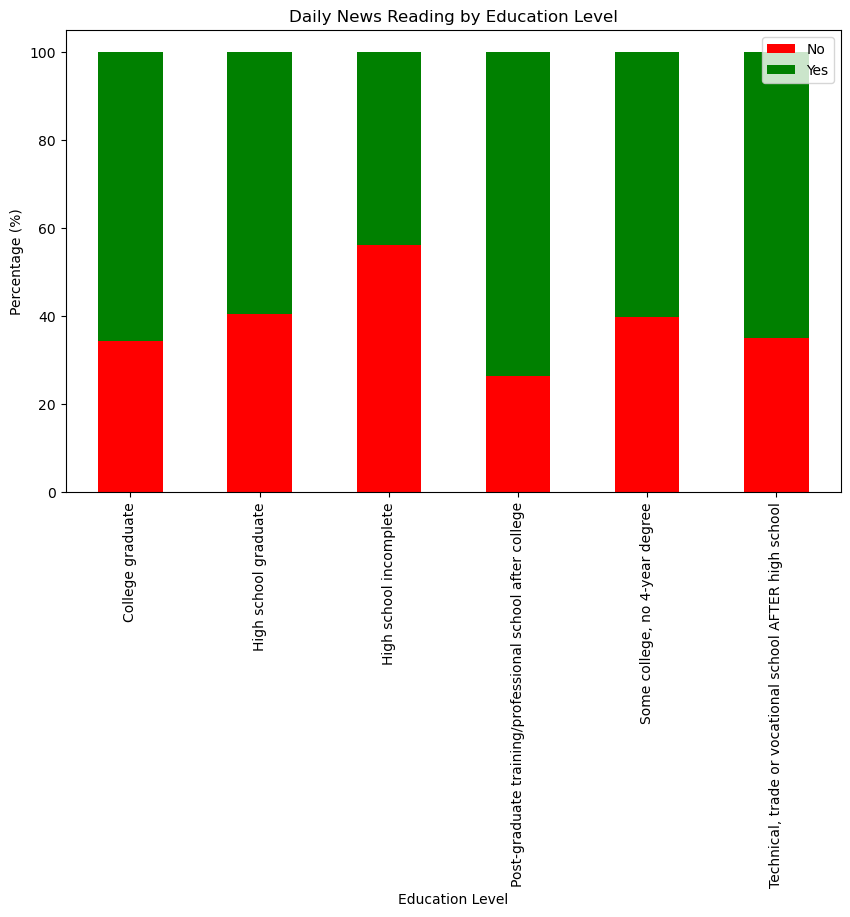

In [6]:
# Tỷ lệ đọc tin tức theo mức độ giáo dục
education_news = df.groupby('education')['read_daily_news'].value_counts(normalize=True).unstack() * 100

# Biểu đồ stacked bar chart
education_news.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Daily News Reading by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.legend(['No', 'Yes'])
plt.show()

**Nhận xét**

Biểu đồ thể hiện mối quan hệ giữa trình độ học vấn và thói quen đọc tin tức hàng ngày cho thấy xu hướng rõ ràng: những người có trình độ học vấn cao hơn (như tốt nghiệp đại học hoặc tham gia các chương trình đào tạo sau đại học) có tỷ lệ đọc tin tức hàng ngày cao hơn so với những người có trình độ học vấn thấp hơn (như chưa hoàn thành trung học). Cụ thể:

* Nhóm có học vấn cao: Tỷ lệ đọc tin tức hàng ngày (màu xanh) chiếm phần lớn, cho thấy mối liên hệ tích cực giữa trình độ học vấn và sự quan tâm đến cập nhật thông tin.
* Nhóm có học vấn thấp hơn: Tỷ lệ không đọc tin tức hàng ngày (màu đỏ) cao hơn, đặc biệt ở những người chưa hoàn thành trung học hoặc chỉ học các chương trình nghề.